## 1. RNN의 문제점
- RNN   
      : 시계열 데이터의 장기 의존 관계를 학습하기 어려움  
      : BPTT에서 기울기 소실/폭발이 일어남

### 1) RNN 복습
- 계층 : 순환 경로  
- 바로 이전 시각의 은닉 상태를 이용해 과거 정보를 계승  
- 순전파에서 수행하는 계산 : 행렬의 곱/합, 활성화 함수 tanh 함수에 의한 변환

### 2) 기울기 소실 / 기울기 폭발
**Tom was watching TV in his room. Mary came into the room. Mary said hi to ____.**

빈칸에 들어갈 말 : "Tom"  
- Tom이 방에서 TV를 보고 있고 그 방에 Mary가 들어왔다는 정보를 RNN 계층의 은닉 상태에 인코딩해 보관해둬야 함

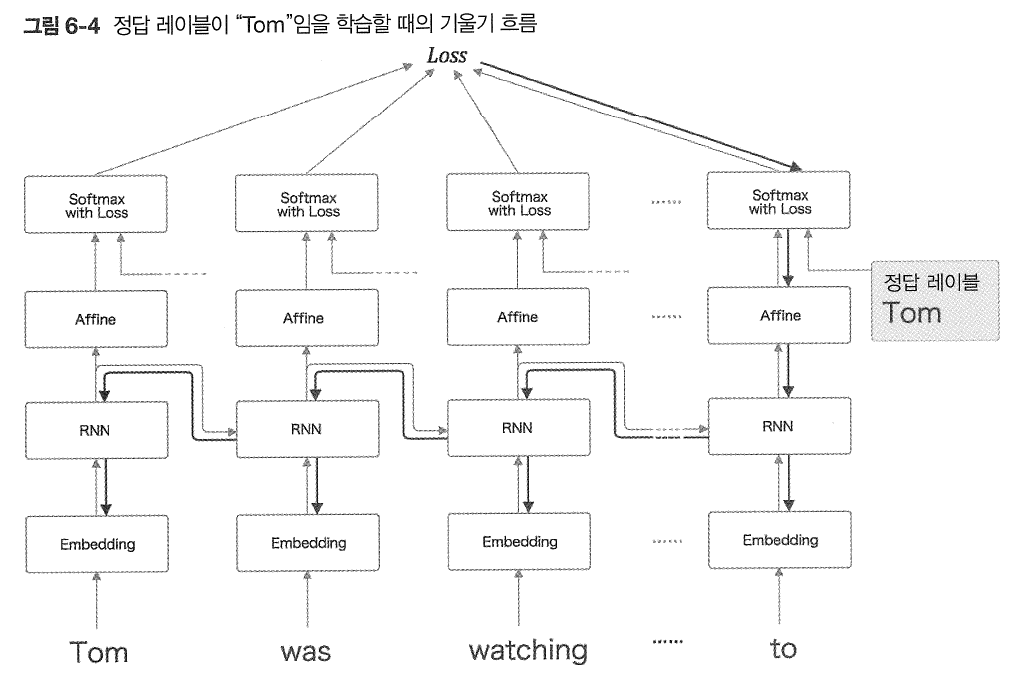

RNN 계층이 과거 방향으로 '의미 있는 기울기'를 전달해 시간 방향의 의존 관계를 학습  
- 기울기 : 학습해야 할 의미가 있는 정보가 들어 있어 이를 과거로 전달해 장기 의존 관계를 학습  

기울기가 중간에 사그라들어 아무런 정보가 남지 않게 된다면,  
***가중치 매개변수는 전혀 갱신되지 않으므로 장기 의존 관계를 학습할 수 없다.***

### 3) 기울기 소실과 기울기 폭발의 원인
역전파로 전해지는 기울기가 통과하는 연산(순서대로)  
1. tanh : 기울기가 계속 작아짐  
x가 0에서 멀어질수록 미분값 작아짐
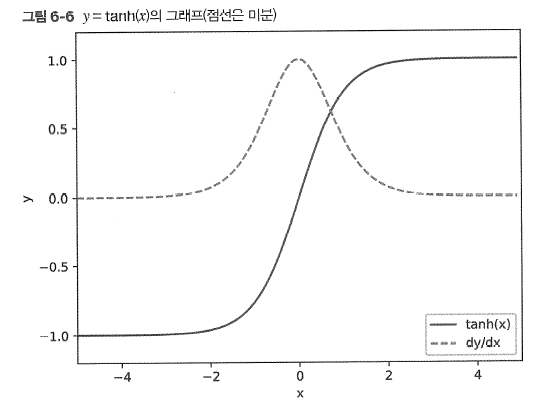
2. 합(+) : 기울기를 그대로 통과  
3. MatMul(행렬 곱) : 매번 똑같은 가중치 Wh를 곱함


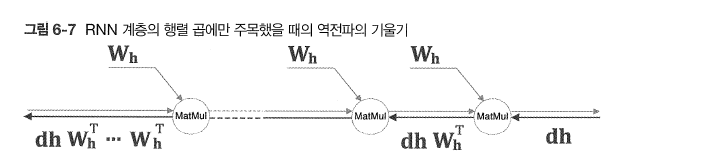

In [2]:
import numpy as np
import matplotlib.pyplot as plt


N = 2   # 미니배치 크기
H = 3   # 은닉 상태 벡터의 차원 수
T = 20  # 시계열 데이터의 길이

dh = np.ones((N, H)) # 초기화

np.random.seed(3) # 재현할 수 있도록 난수의 시드 고정

Wh = np.random.randn(H, H)

norm_list = []
for t in range(T): # 역전파의 MatMul 노드 수(T)만큼 dh 갱신
    dh = np.dot(dh, Wh.T)
    norm = np.sqrt(np.sum(dh**2)) / N # 미니배치 N개의 평균 L2 norm 계산 : dh 크기
    norm_list.append(norm)
    
print(norm_list)

[2.4684068094579303, 3.335704974161037, 4.783279375373183, 6.2795873320876145, 8.080776465019055, 10.25116303229294, 12.9360635066099, 16.276861327786712, 20.454829618345983, 25.688972842084684, 32.25315718048336, 40.48895641683869, 50.824407307019094, 63.79612654485427, 80.07737014308985, 100.51298922051251, 126.16331847536827, 158.3592064825883, 198.77107967611957, 249.495615421267]


C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarni

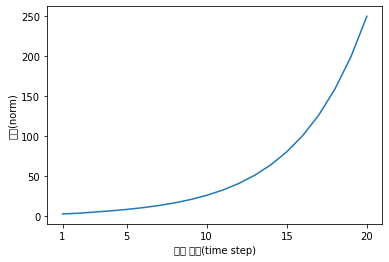

In [3]:
# 그래프 그리기
plt.plot(np.arange(len(norm_list)), norm_list)
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('시간 크기(time step)')
plt.ylabel('노름(norm)')
plt.show()

**기울기 폭발(exploding gradients)** : 기울기의 크기가 시간에 비례해 지수적 증가  
- 오버플로를 일으켜 NaN(Not a Number, 잘못된 입력으로 인해 계산을 할 수 없음) 값 발생  
- 신경망 학습 불가

C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarni

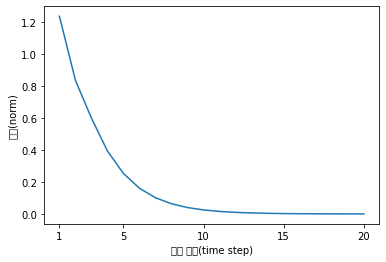

In [6]:
N = 2  
H = 3  
T = 20 

dh = np.ones((N, H))

np.random.seed(3)

Wh = np.random.randn(H,H)*0.5 # 추가 : 0.5를 곱함

norm_list = []
for t in range(T): 
    dh = np.dot(dh, Wh.T)
    norm = np.sqrt(np.sum(dh**2)) / N 
    norm_list.append(norm)
    
plt.plot(np.arange(len(norm_list)), norm_list)
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('시간 크기(time step)')
plt.ylabel('노름(norm)')
plt.show()

**기울기 소실(vanishing gradients)** : 기울기가 지수적 감소  
- 기울기가 일정 수준 이하로 작아지면 매개변수가 갱신되지 않아 장기 의존 관계 학습 불가

지수적 변화(증가/감소)의 이유 :  
- 행렬 Wh를 T번 반복해서 곱했기 때문!  
- Wh : scalar ⇒ Wh > 1 : 지수적 증가, Wh < 1 : 지수적 감소  
- Wh : 행렬 ⇒ 행렬의 '특잇값(데이터가 얼마나 퍼져있는지)'이 1보다 큰지 여부를 통해 예측

### 4) 기울기 폭발 대책
1. 기울기 폭발 : **기울기 클리핑(gradients clipping)**  
g_hat : 모든 매개변수에 대한 통합 기울기  
→ 기울기의 L2 norm(g_hat) > threshold : 기울기를 아래와 같이 수정  
※ L2 norm : 각 원소를 제곱해 더하고 제곱근 계산
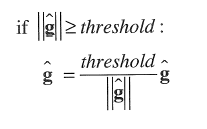

In [7]:
dW1 = np.random.rand(3, 3) * 10
dW2 = np.random.rand(3, 3) * 10
grads = [dW1, dW2]
max_norm = 5.0


def clip_grads(grads, max_norm):
    total_norm = 0
    for grad in grads:
        total_norm += np.sum(grad ** 2)
    total_norm = np.sqrt(total_norm)

    rate = max_norm / (total_norm + 1e-6)
    if rate < 1:
        for grad in grads:
            grad *= rate


print('before:', dW1.flatten())
clip_grads(grads, max_norm)
print('after:', dW1.flatten())

before: [6.49144048 2.78487283 6.76254902 5.90862817 0.23981882 5.58854088
 2.59252447 4.15101197 2.83525082]
after: [1.49503731 0.64138134 1.55747605 1.36081038 0.05523244 1.28709139
 0.59708178 0.95601551 0.65298384]


**기울기 클리핑을 통해 기울기 값 감소**

## 2. 기울기 소실과 LSTM

- 기울기 소실을 해결하기 위해 **기존 RNN에 게이트 추가**  
- 게이트가 추가된 RNN의 대표적 예 : **LSTM, GRU**  

### 1) LSTM의 인터페이스
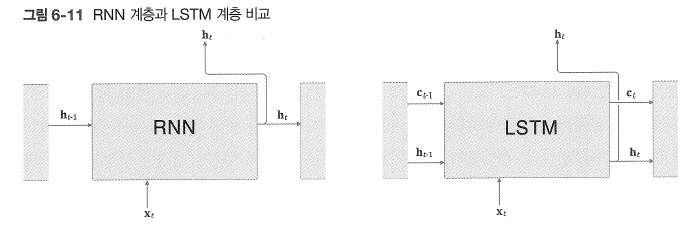
**LSTM의 c 경로** : **기억 셀**, LSTM 전용 기억 메커니즘  
- 자기 자신(LSTM 계층 내에서만)만 주고받는다.  
- LSTM 계층 내에서만 완결, 다른 계층으로는 출력 안 됨  


**LSTM의 h 경로** : **은닉 상태**  
- RNN 계층처럼 다른 계층(위쪽)으로 출력

### 2) LSTM 계층 조립하기
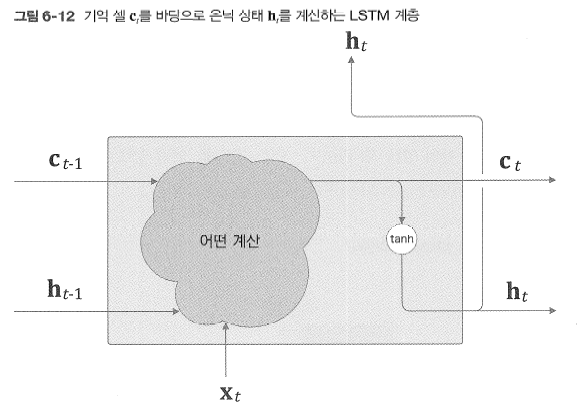
1) 기억 셀 c  
- 과거부터 시각 t까지 필요한 모든 LSTM 기억이 저장  
- c_{t-1},h_{t-1},x_t 입력값에 계산을 수행해 구함  

2) 은닉 상태 h  
- 기억 셀을 바탕으로 외부 계층/다음 시각의 LSTM에 출력됨  
- h_t = tanh(c_t)

**게이트** : 데이터의 흐름을 제어  
- 열기/닫기 + **"어느 정도 열지" 조절**  
- 열림상태(openness) : 0~1 범위에서 제어, 시그모이드 함수 사용

### 3) output 게이트
output 게이트  
- tanh(c_t)에 적용된 게이트, 즉 은닉 상태 h_t의 출력을 담당하는 게이트  
- 각 원소에 대해 다음 시각의 은닉 상태에 얼마나 중요한지를 조정  
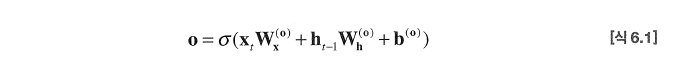


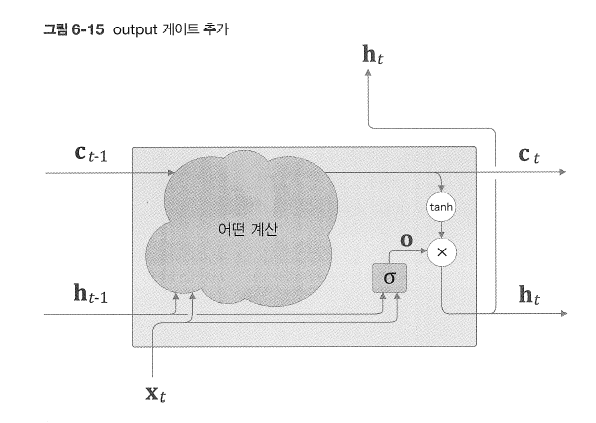

$$h_t = o ⨀ tanh(c_t)$$  
※ ⨀ : **아다마르 곱** = 원소별 곱

### 4) forget 게이트
forget 게이트(망각 게이트)  
- 기억 셀에 **"무엇을 잊을까"** 지시  
- c_{t-1}의 기억 중 불필요한 기억 잊게 하는 게이트  
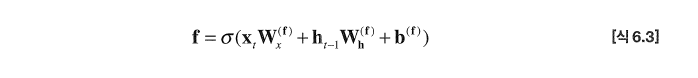

- 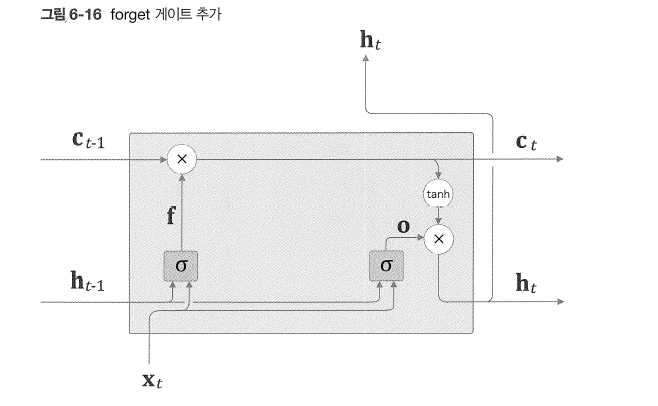

$$c_t = f ⨀ c_{t-1}$$

### 5) 새로운 기억 셀
tanh 노드  
- 새로 기억해야 할 정보를 기억 셀에 추가  
- 목적 : "게이트"가 아님!, 새로운 "정보"를 기억 셀에 추가하는 것  
- 활성화 함수로 시그모이드 함수가 아닌 tanh 함수 사용 
- 그 결과는 이전 시각의 기억 셀 c_{t-1}에 더해짐
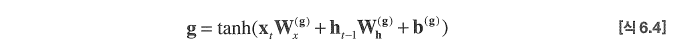

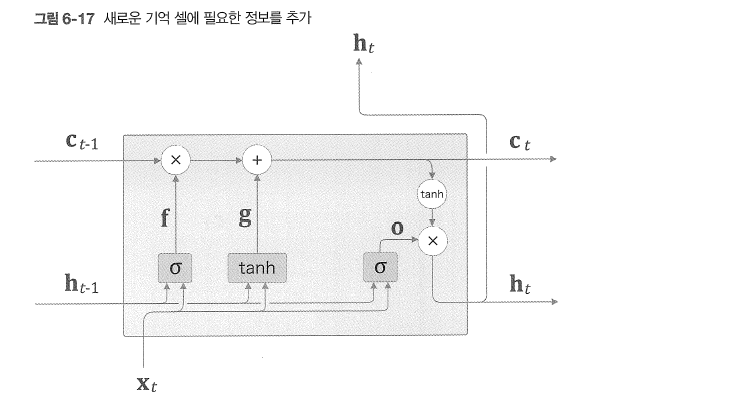

### 6) input 게이트
input 게이트  
- 앞에 기억 셀에 추가된 새로운 기억 **g**의 원소가 새로 추가되는 정보로써 가치가 얼마나 큰지!  
- 적절히 취사선택하는 역할  
- 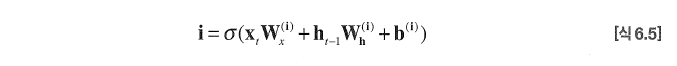

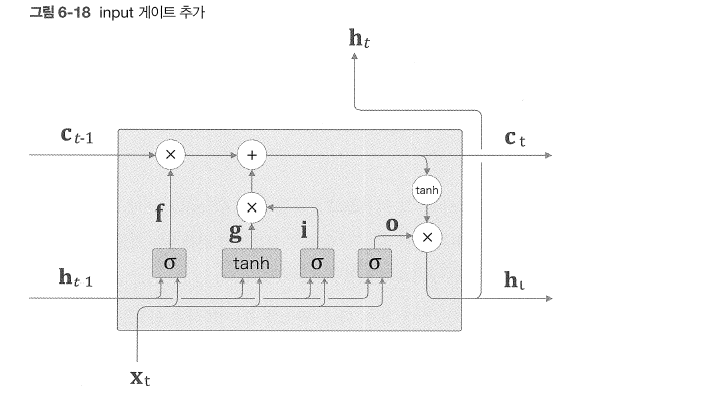

### 7) LSTM의 기울기 흐름
기억 셀의 역전파가 덧셈, 곱셈 노드만을 지남  
1) "+" 노드 : 상류에서 전해지는 기울기 그대로 흘려보내 기울기 변화 없음  
<br>
2) "x" 노드 : 행렬 곱이 아닌 원소별 곱(⨀) 계산  
- 매 시각 다른 게이트 값을 이용해 원소별 곱 계산  
- 곱셈의 효과가 누적되지 않아 기울기 소실이 일어나기 어려움  
- forget 게이트가 제어 : 잊어야 판단한 기억 셀 원소의 기울기는 작아지고 잊어서는 안 된다고 판단한 기억 셀 원소에 대해서는 기울기 약화시키지 않은 채로 전달

## 3. LSTM 구현
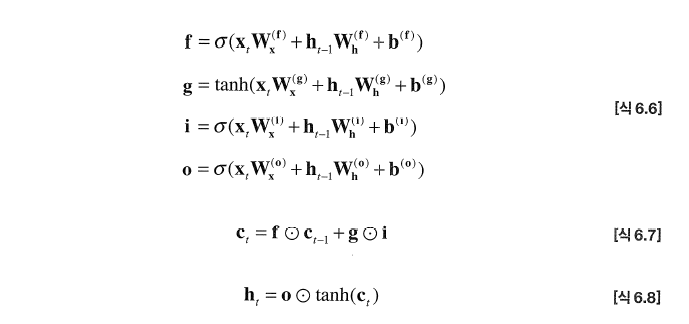

앞에서 다룬 forget 게이트, 기억 셀에 추가된 새로운 기억, input 게이트, output 게이트, 기억 셀과 은닉 상태에 관한 식!  
<br>
식 6.6의 **"아핀 변환(Affine transformation)"**
- 행렬 변환과 평행 이동(편향)을 결합한 형태  
<br>
- $$xW_x + hW_h + b$$  
<br>
<br>
⇒ 각 식의 가중치, 편향을 모아 4번의 개별 계산을 한 번의 아핀 변환 계산으로!  

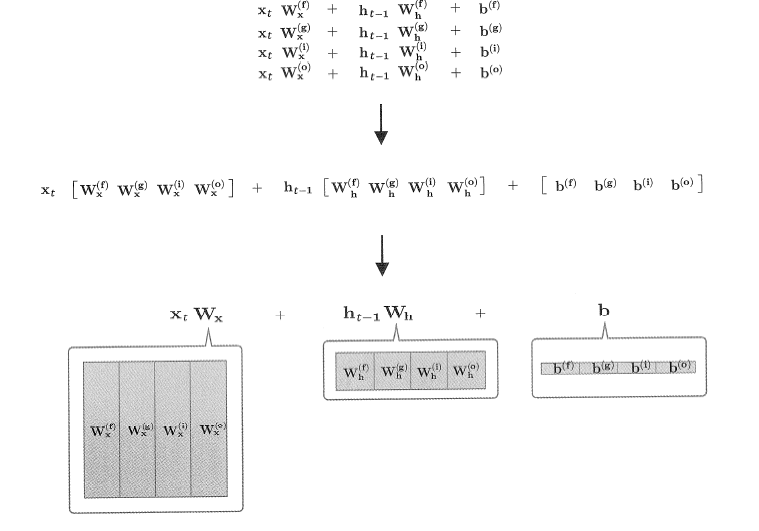

**LSTM 그래프**
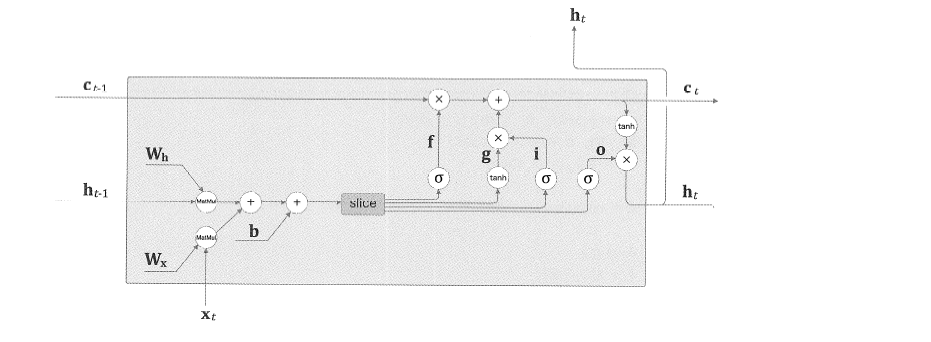

4개의 아핀 변환 수행 → **slice 노드** → 활성화 함수(시그모이드 or tanh 함수) → forget, input, output, 새 정보 입력 등 계산 수행  
<br>
※ **slice 노드** : 아핀 변환의 결과를 동등하게 네 조각으로 나눠 꺼내주는 노드

In [8]:
class LSTM:
    def __init__(self, Wx, Wh, b): # 가중치 매개변수 & 편향
        '''
        Parameters
        ----------
        Wx: 입력 x에 대한 가중치 매개변수(4개분의 가중치가 담겨 있음)
        Wh: 은닉 상태 h에 대한 가장추 매개변수(4개분의 가중치가 담겨 있음)
        b: 편향（4개분의 편향이 담겨 있음）
        '''
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)] # 기울기 초기화
        self.cache = None # cache : 순전파 결과를 보관했다 역전파 계산에 사용하기 위한 인스턴스 변수

In [9]:
def forward(self, x, h_prev, c_prev): # 순전파
        '''
        Parameters
        ----------
        x : 현 시각의 입력
        h_prev : 이전 시각의 은닉 상태 = h_{t-1}
        c_prev : 이전 시각의 기억 셀 = c_{t-1}
        '''
        Wx, Wh, b = self.params
        N, H = h_prev.shape

        A = np.dot(x, Wx) + np.dot(h_prev, Wh) + b # 아핀 변환

        # A : N(미니배치 수) x 4H(c,h의 차원 수)
        f = A[:, :H]
        g = A[:, H:2*H]
        i = A[:, 2*H:3*H]
        o = A[:, 3*H:]

        f = sigmoid(f)
        g = np.tanh(g)
        i = sigmoid(i)
        o = sigmoid(o)

        c_next = f * c_prev + g * i
        h_next = o * np.tanh(c_next)

        self.cache = (x, h_prev, c_prev, i, f, g, o, c_next)
        return h_next, c_next

**slice노드에서 네 조각으로 나눠 분배**  
⇆ **역전파에서는 반대로 4개의 기울기 결합**

In [10]:
def backward(self, dh_next, dc_next): # 역전파
        Wx, Wh, b = self.params
        x, h_prev, c_prev, i, f, g, o, c_next = self.cache

        tanh_c_next = np.tanh(c_next)

        ds = dc_next + (dh_next * o) * (1 - tanh_c_next ** 2)

        dc_prev = ds * f

        di = ds * g
        df = ds * c_prev
        do = dh_next * tanh_c_next
        dg = ds * i

        di *= i * (1 - i)
        df *= f * (1 - f)
        do *= o * (1 - o)
        dg *= (1 - g ** 2)

        dA = np.hstack((df, dg, di, do)) # 4개의 행렬을 가로로 연결!

        dWh = np.dot(h_prev.T, dA)
        dWx = np.dot(x.T, dA)
        db = dA.sum(axis=0)

        self.grads[0][...] = dWx
        self.grads[1][...] = dWh
        self.grads[2][...] = db

        dx = np.dot(dA, Wx.T)
        dh_prev = np.dot(dA, Wh.T)

        return dx, dh_prev, dc_prev

### 1) TimeLSTM 구현
TimeLSTM : T개분의 시계열 데이터를 한꺼번에 처리하는 계층  
- TimeRNN 클래스와 흡사  
> LSTM 계층의 은닉 상태를 TimeLSTM 계층에서 관리  
인수 ```stateful``` : 은닉 상태를 인계받을지 조정하는 인수
  - ```stateful = True``` : TimeLSTM 계층이 은닉 상태를 유지, 순전파를 끊지 않고 전파  
  - ```stateful = False``` : TimeLSTM 계층이 은닉 상태를 '0행렬'로 초기화 = "무상태"
<br><br>
- 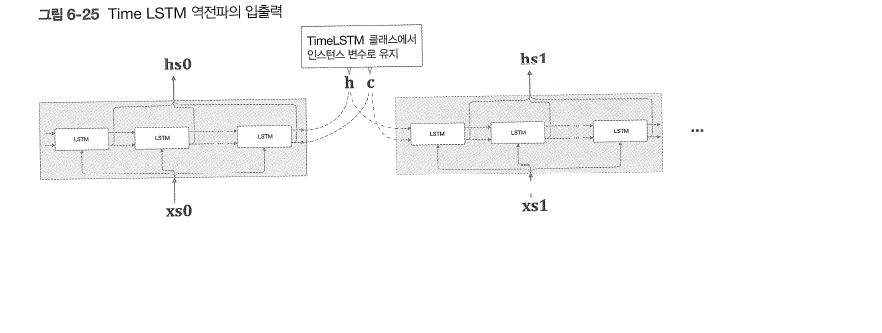

In [12]:
class TimeLSTM:
    def __init__(self, Wx, Wh, b, stateful=False):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)] #기울기 초기화
        self.layers = None # 다수의 계층을 리스트로 저장하는 용도

        self.h, self.c = None, None # h : 순전파의 마지막 은닉 상태 저장
        self.dh = None # dh : 역전파 적용 시 하나 앞 블록의 은닉 상태의 기울기 저장
        self.stateful = stateful

    def forward(self, xs): # 순전파, xs : T개 분량의 시계열 데이터를 하나로 모은 것
        Wx, Wh, b = self.params
        N, T, D = xs.shape # N : 미니배치 크기, D : 입력 벡터의 차원 수
        H = Wh.shape[0]

        self.layers = []
        hs = np.empty((N, T, H), dtype='f')

        if not self.stateful or self.h is None:  # LSTM 계층의 은닉 상태 h가 처음 호출 시 & stateful = False일 때: '영(0)행렬'로 초기화
            self.h = np.zeros((N, H), dtype='f')
        if not self.stateful or self.c is None:
            self.c = np.zeros((N, H), dtype='f')

        for t in range(T):
            layer = LSTM(*self.params)
            self.h, self.c = layer.forward(xs[:, t, :], self.h, self.c)
            hs[:, t, :] = self.h

            self.layers.append(layer)

        return hs

    def backward(self, dhs): #역전파
        Wx, Wh, b = self.params
        N, T, H = dhs.shape
        D = Wx.shape[0]

        dxs = np.empty((N, T, D), dtype='f')
        dh, dc = 0, 0

        grads = [0, 0, 0]
        for t in reversed(range(T)):
            layer = self.layers[t]
            dx, dh, dc = layer.backward(dhs[:, t, :] + dh, dc)
            dxs[:, t, :] = dx
            for i, grad in enumerate(layer.grads):
                grads[i] += grad

        for i, grad in enumerate(grads):
            self.grads[i][...] = grad
        self.dh = dh
        return dxs

    def set_state(self, h, c=None):
        self.h, self.c = h, c

    def reset_state(self):
        self.h, self.c = None, None


## 4. LSTM을 사용한 언어 모델
- TimeRNN 계층 대신 TimeLSTM 계층으로!
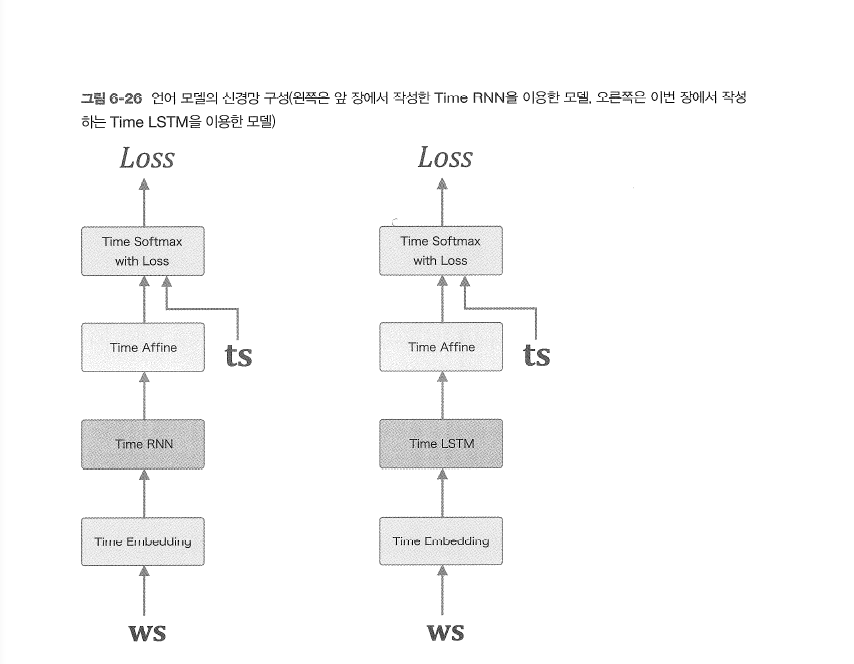

In [20]:
import sys
sys.path.append('..')
from common.time_layers import *
import pickle

class Rnnlm:
    def __init__(self, vocab_size=10000, wordvec_size=100, hidden_size=100):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        # 가중치 초기화 : 사비에르 초깃값 - 이전 계층의 노드가 n개면 표•편이 1/sqrt(n) 분포로 값들을  초기화
        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        # 계층 생성
        self.layers = [
            TimeEmbedding(embed_W),
            TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True), # stateful = True : TimeLSTM 계층이 이전 시각의 은닉 상태 계승
            TimeAffine(affine_W, affine_b)
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.lstm_layer = self.layers[1]

        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, xs): # softmax 계층 직전까지 처리, 문장 생성에 사용
        for layer in self.layers:
            xs = layer.forward(xs)
        return xs

    def forward(self, xs, ts):
        score = self.predict(xs)
        loss = self.loss_layer.forward(score, ts)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

    def reset_state(self): # 신경망의 상태를 초기화
        self.lstm_layer.reset_state()
        
        
    def save_params(self,file_name = "Rnnlm.pkl"): # 매개변수 쓰기
        with open(file_name,'wb') as f:
            pickle.dump(self.params,f)
            
    def load_params(self,file_name = 'Rnnlm.pkl'): # 매개변수 읽기
        with open(file_name,'rb') as f:
            self.params = pickle.load(f)

Done
| 에폭 1 |  반복 1 / 1327 | 시간 1[s] | 퍼플렉서티 9999.69
| 에폭 1 |  반복 21 / 1327 | 시간 18[s] | 퍼플렉서티 2965.95
| 에폭 1 |  반복 41 / 1327 | 시간 41[s] | 퍼플렉서티 1247.92
| 에폭 1 |  반복 61 / 1327 | 시간 60[s] | 퍼플렉서티 963.70
| 에폭 1 |  반복 81 / 1327 | 시간 81[s] | 퍼플렉서티 792.76
| 에폭 1 |  반복 101 / 1327 | 시간 98[s] | 퍼플렉서티 651.81
| 에폭 1 |  반복 121 / 1327 | 시간 116[s] | 퍼플렉서티 621.46
| 에폭 1 |  반복 141 / 1327 | 시간 143[s] | 퍼플렉서티 589.76
| 에폭 1 |  반복 161 / 1327 | 시간 165[s] | 퍼플렉서티 588.18
| 에폭 1 |  반복 181 / 1327 | 시간 180[s] | 퍼플렉서티 592.36
| 에폭 1 |  반복 201 / 1327 | 시간 199[s] | 퍼플렉서티 509.08
| 에폭 1 |  반복 221 / 1327 | 시간 221[s] | 퍼플렉서티 493.94
| 에폭 1 |  반복 241 / 1327 | 시간 247[s] | 퍼플렉서티 437.68
| 에폭 1 |  반복 261 / 1327 | 시간 265[s] | 퍼플렉서티 483.63
| 에폭 1 |  반복 281 / 1327 | 시간 280[s] | 퍼플렉서티 452.33
| 에폭 1 |  반복 301 / 1327 | 시간 296[s] | 퍼플렉서티 399.73
| 에폭 1 |  반복 321 / 1327 | 시간 315[s] | 퍼플렉서티 343.17
| 에폭 1 |  반복 341 / 1327 | 시간 338[s] | 퍼플렉서티 403.13
| 에폭 1 |  반복 361 / 1327 | 시간 360[s] | 퍼플렉서티 409.59
| 에폭 1 |  반복 381 / 1327 | 시간 382[s] 

| 에폭 3 |  반복 481 / 1327 | 시간 3123[s] | 퍼플렉서티 120.49
| 에폭 3 |  반복 501 / 1327 | 시간 3137[s] | 퍼플렉서티 130.15
| 에폭 3 |  반복 521 / 1327 | 시간 3156[s] | 퍼플렉서티 138.00
| 에폭 3 |  반복 541 / 1327 | 시간 3184[s] | 퍼플렉서티 136.88
| 에폭 3 |  반복 561 / 1327 | 시간 3209[s] | 퍼플렉서티 119.69
| 에폭 3 |  반복 581 / 1327 | 시간 3224[s] | 퍼플렉서티 105.81
| 에폭 3 |  반복 601 / 1327 | 시간 3238[s] | 퍼플렉서티 148.03
| 에폭 3 |  반복 621 / 1327 | 시간 3257[s] | 퍼플렉서티 143.41
| 에폭 3 |  반복 641 / 1327 | 시간 3276[s] | 퍼플렉서티 129.75
| 에폭 3 |  반복 661 / 1327 | 시간 3309[s] | 퍼플렉서티 121.26
| 에폭 3 |  반복 681 / 1327 | 시간 3329[s] | 퍼플렉서티 102.45
| 에폭 3 |  반복 701 / 1327 | 시간 3344[s] | 퍼플렉서티 119.93
| 에폭 3 |  반복 721 / 1327 | 시간 3362[s] | 퍼플렉서티 126.94
| 에폭 3 |  반복 741 / 1327 | 시간 3381[s] | 퍼플렉서티 108.03
| 에폭 3 |  반복 761 / 1327 | 시간 3406[s] | 퍼플렉서티 102.53
| 에폭 3 |  반복 781 / 1327 | 시간 3438[s] | 퍼플렉서티 105.52
| 에폭 3 |  반복 801 / 1327 | 시간 3456[s] | 퍼플렉서티 116.60
| 에폭 3 |  반복 821 / 1327 | 시간 3475[s] | 퍼플렉서티 118.19
| 에폭 3 |  반복 841 / 1327 | 시간 3494[s] | 퍼플렉서티 114.17
| 에폭 3 |  반복

C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47113 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarni

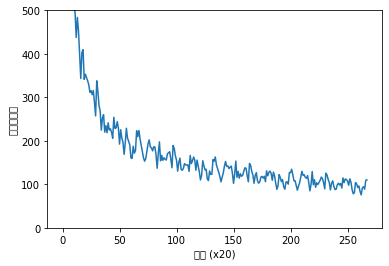

퍼플렉서티 평가 중 ...
234 / 235
테스트 퍼플렉서티:  135.88323111416858


In [24]:
import sys
sys.path.append('..')
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from common.util import eval_perplexity
from dataset import ptb
from ch06.rnnlm import Rnnlm


# 하이퍼파라미터 설정
batch_size = 20
wordvec_size = 100
hidden_size = 100  # RNN의 은닉 상태 벡터의 원소 수
time_size = 35     # RNN을 펼치는 크기
lr = 20.0
max_epoch = 4
max_grad = 0.25

# 학습 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_test, _, _ = ptb.load_data('test')
vocab_size = len(word_to_id)
xs = corpus[:-1]
ts = corpus[1:]

# 모델 생성
model = Rnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

# 기울기 클리핑을 적용하여 학습
trainer.fit(xs, ts, max_epoch, batch_size, time_size, max_grad,
            eval_interval=20) # fit() : 모델 기울기를 구해 모델의 매개변수 갱신
                              # max_grad : 기울기 클리핑 적용
                              # eval_interval : 20번째 반복마다 perplexity 평가
'''
        fit() 구현
        ----------
        # 기울기 구하기
        model.forward(...)
        model.backward(...)
        params, grads = model.params, model.grads
        
        # 기울기 클리핑
        if max_grad is not None:
            clip_grads(grads,max_grad) # 앞에서 구현
        
        # 매개변수 갱신
        optimizer.update(params,grads)

'''
trainer.plot(ylim=(0, 500))

# 테스트 데이터로 평가
model.reset_state() # 모델 상태를 재설정(LSTM의 은닉 상태와 기억 셀)해 평가를 수행
ppl_test = eval_perplexity(model, corpus_test)
print('테스트 퍼플렉서티: ', ppl_test)

# 매개변수 저장
model.save_params()

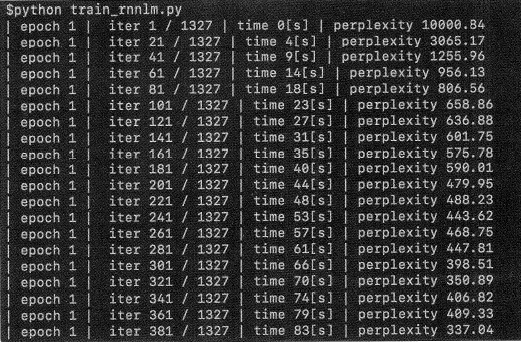  
- perplexity = 10,000 : 다음에 나올 수 있는 후보 단어 수가 10,000개

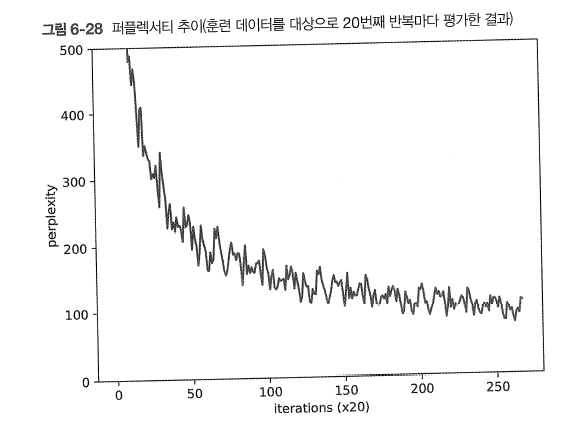

**결론**
- 총 4에포크의 학습 수행, 
- 다음에 나올 단어의 후보를 전체 10,000개 중 136개 정도로 줄일 수 있을 때까지 개선  
- 여전히 높은 값..

## 5. RNNLM 추가 개선
### 1) LSTM 계층 다층화
보다 정확한 모델을 만들고자 할 때 **LSTM 계층을 깊게 쌓는다!**
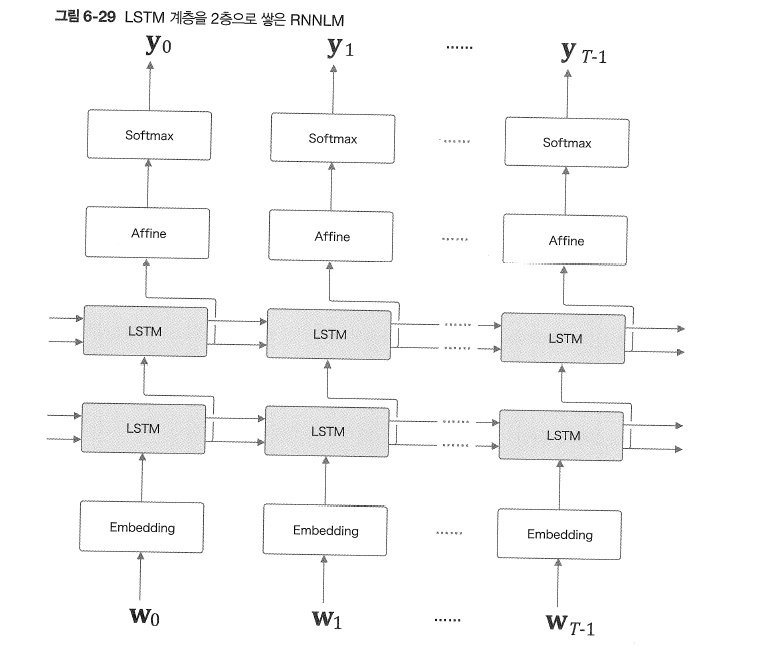

- 첫 번째 LSTM 계층의 은닉 상태가 두 번째 LSTM 계층에 입력  
- LSTM 계층을 몇 층이라도 쌓을 수 있음  
- 구체적으로 몇 층? : **하이퍼파라미터**의 문제!

### 2) 드롭아웃에 의한 과적합 억제
LSTM 계층 다층화의 문제점 : **과적합(overfitting)**  
- 훈련 데이터에만 너무 치중해 학습된 상태, 일반화 능력 결여
- RNN은 일반 피드포워드 신경망보다도 과적합 쉽게 일어남  
<br>
- 방법 : 훈련 데이터 양 늘리기, 모델 복잡도 줄이기, 정규화(모델 복잡도에 페널티 부여, 예. L2 정규화는 가중치 너무 크면 페널티 부과)

**드롭아웃(dropout)** - 훈련 시 계층 내 뉴런 몇 개를 무작위로 무시하고 학습  
- '무시' : 그 앞 계층으로부터의 신호 전달을 막음  
> 삽입 위치?
  - 시계열 방향 : **BAD** - 시간 흐름에 따라 정보가 사라질 수 있음, 흐르는 시간에 비례해 드롭아웃에 의한 노이즈 축척  
  - 깊이 방향(상하 방향) : **GOOD** - 시간 방향으로 아무리 진행해도 정보를 잃지 않고 시간축과 독립적으로 상하 방향에만 영향을 줌  
  
- 최근 연구 : RNN의 시간 방향 정규화를 목표  
> **변형 드롭아웃(Variational Dropout)**  
  - 깊이 방향은 물론 시간 방향에도 이용 가능  
  - 언어 모델 정확도 한층 향상
  - 같은 계층에 속한 드롭아웃은 같은 마스크(mask, 데이터 통과/차단을 결정하는 이진 형태의 무작위 패턴) 공유 → 마스크가 '고정' → 정보를 잃는 방법도 '고정'

### 3) 가중치 공유
- 학습하는 매개변수 수가 줄도 정확도는 향상된다.
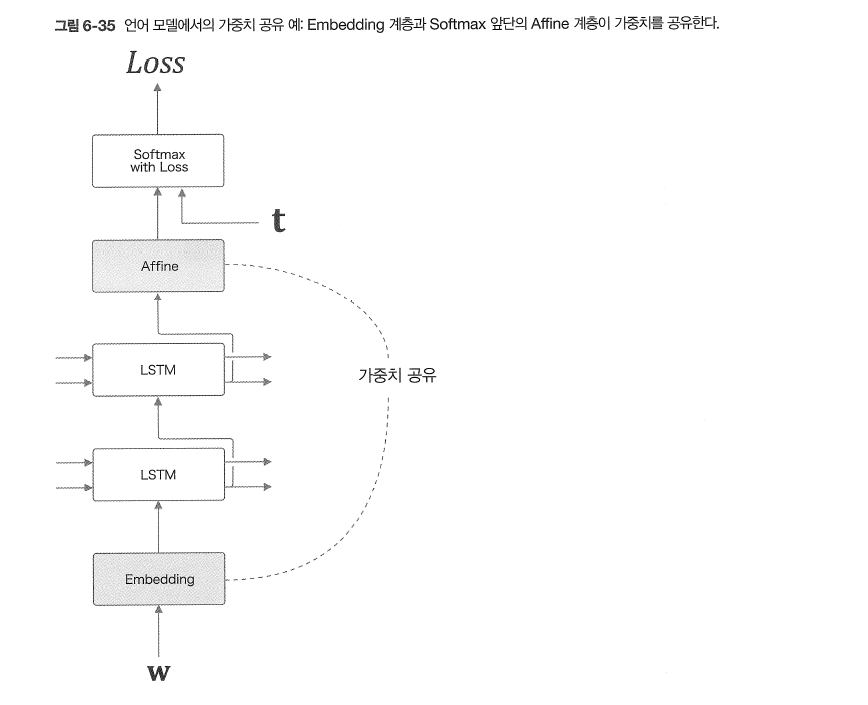
- 가중치 공유 적용 방법 : Embedding 계층의 가중치를 전치해 Affine 계층의 가중치로 설정

### 4) 개선된 RNNLM 구현
> **개선사항**
1. LSTM 계층의 다층화(2층)  
2. 드롭아웃 사용(깊이 방향만)  
3. 가중치 공유(Embedding 계층 - Affine 계층)
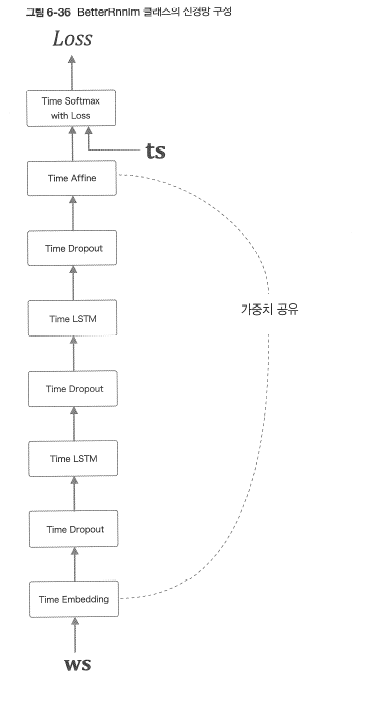

In [19]:
import sys
sys.path.append('..')
from common.time_layers import *
from common.np import *  # import numpy as np
from common.base_model import BaseModel


class BetterRnnlm(BaseModel):
    '''
     LSTM 계층을 2개 사용하고 각 층에 드롭아웃을 적용한 모델이다.
     아래 [1]에서 제안한 모델을 기초로 하였고, [2]와 [3]의 가중치 공유(weight tying)를 적용했다.
     [1] Recurrent Neural Network Regularization (https://arxiv.org/abs/1409.2329)
     [2] Using the Output Embedding to Improve Language Models (https://arxiv.org/abs/1608.05859)
     [3] Tying Word Vectors and Word Classifiers (https://arxiv.org/pdf/1611.01462.pdf)
    '''
    def __init__(self, vocab_size=10000, wordvec_size=650,
                 hidden_size=650, dropout_ratio=0.5):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx1 = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh1 = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b1 = np.zeros(4 * H).astype('f')
        lstm_Wx2 = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_Wh2 = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b2 = np.zeros(4 * H).astype('f')
        affine_b = np.zeros(V).astype('f')

        # 세 가지 개선!
        self.layers = [
            TimeEmbedding(embed_W),
            TimeDropout(dropout_ratio),
            TimeLSTM(lstm_Wx1, lstm_Wh1, lstm_b1, stateful=True),
            TimeDropout(dropout_ratio),
            TimeLSTM(lstm_Wx2, lstm_Wh2, lstm_b2, stateful=True),
            TimeDropout(dropout_ratio),
            TimeAffine(embed_W.T, affine_b)  # weight tying!!
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.lstm_layers = [self.layers[2], self.layers[4]]
        self.drop_layers = [self.layers[1], self.layers[3], self.layers[5]]

        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, xs, train_flg=False):
        for layer in self.drop_layers:
            layer.train_flg = train_flg

        for layer in self.layers:
            xs = layer.forward(xs)
        return xs

    def forward(self, xs, ts, train_flg=True):
        score = self.predict(xs, train_flg)
        loss = self.loss_layer.forward(score, ts)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

    def reset_state(self):
        for layer in self.lstm_layers:
            layer.reset_state()

💭 매 에포크에서 검증 데이터로 perplexity를 평가하고 그 값이 나빠졌을 때에만 학습률을 1/4로 낮추자!

In [ ]:
import sys
sys.path.append('..')
from common import config
# GPU에서 실행하려면 아래 주석을 해제하세요(CuPy 필요).
# ==============================================
# config.GPU = True
# ==============================================
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from common.util import eval_perplexity, to_gpu
from dataset import ptb
from better_rnnlm import BetterRnnlm


# 하이퍼파라미터 설정
batch_size = 20
wordvec_size = 650
hidden_size = 650
time_size = 35
lr = 20.0
max_epoch = 40
max_grad = 0.25
dropout = 0.5

# 학습 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_val, _, _ = ptb.load_data('val')
corpus_test, _, _ = ptb.load_data('test')

if config.GPU:
    corpus = to_gpu(corpus)
    corpus_val = to_gpu(corpus_val)
    corpus_test = to_gpu(corpus_test)

vocab_size = len(word_to_id)
xs = corpus[:-1]
ts = corpus[1:]

model = BetterRnnlm(vocab_size, wordvec_size, hidden_size, dropout)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

best_ppl = float('inf')
for epoch in range(max_epoch):
    trainer.fit(xs, ts, max_epoch=1, batch_size=batch_size,
                time_size=time_size, max_grad=max_grad)

    model.reset_state()
    ppl = eval_perplexity(model, corpus_val)
    print('검증 퍼플렉서티: ', ppl)

    if best_ppl > ppl:
        best_ppl = ppl
        model.save_params()
    else:
        lr /= 4.0
        optimizer.lr = lr

    model.reset_state()
    print('-' * 50)


# 테스트 데이터로 평가
model.reset_state()
ppl_test = eval_perplexity(model, corpus_test)
print('테스트 퍼플렉서티: ', ppl_test)

학습 완료 : https://www.oreilly.co.jp/pub/9784873118369/BetterRnnlm.pkl  
**개선 전 RNNLM의 perplexity = 136 ⇒ 최종 perplexity = 75.76으로 개선!**